
--- Summary Statistics ---
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000      

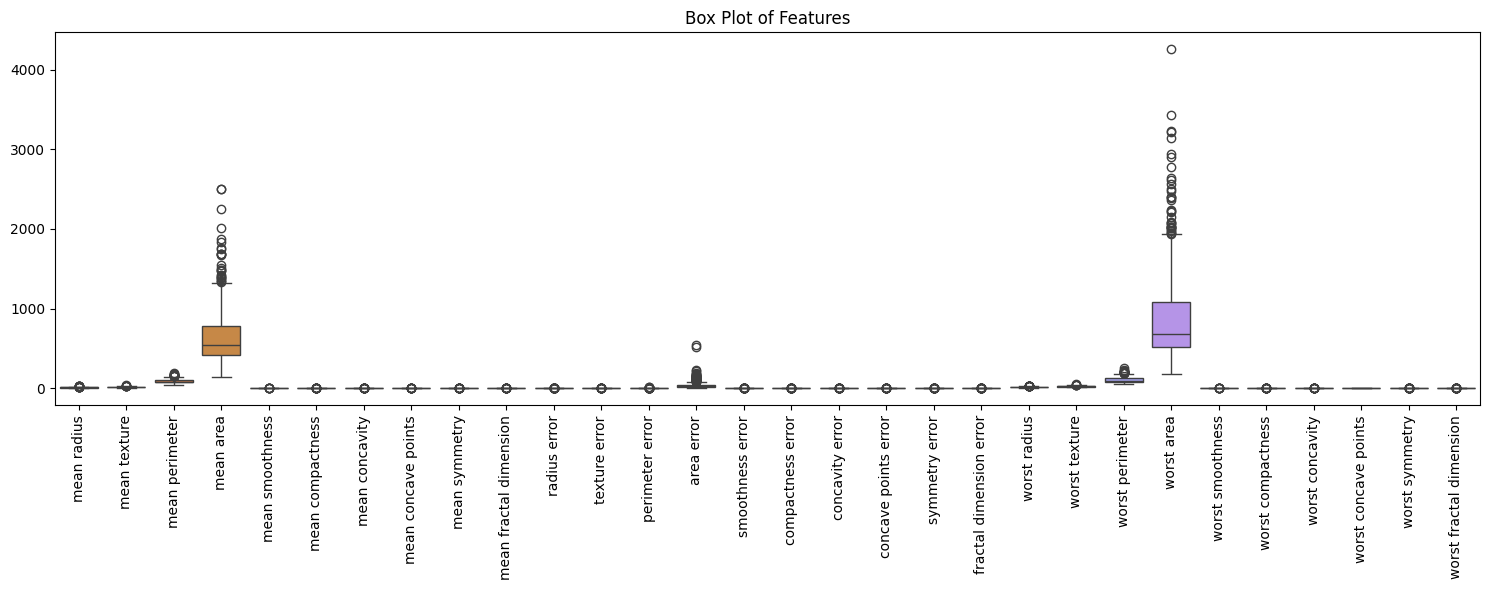

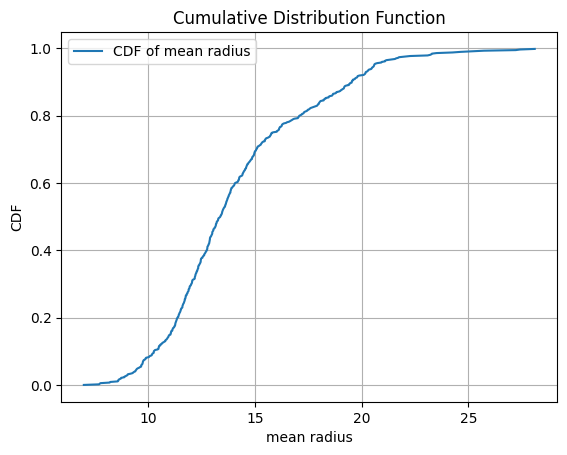

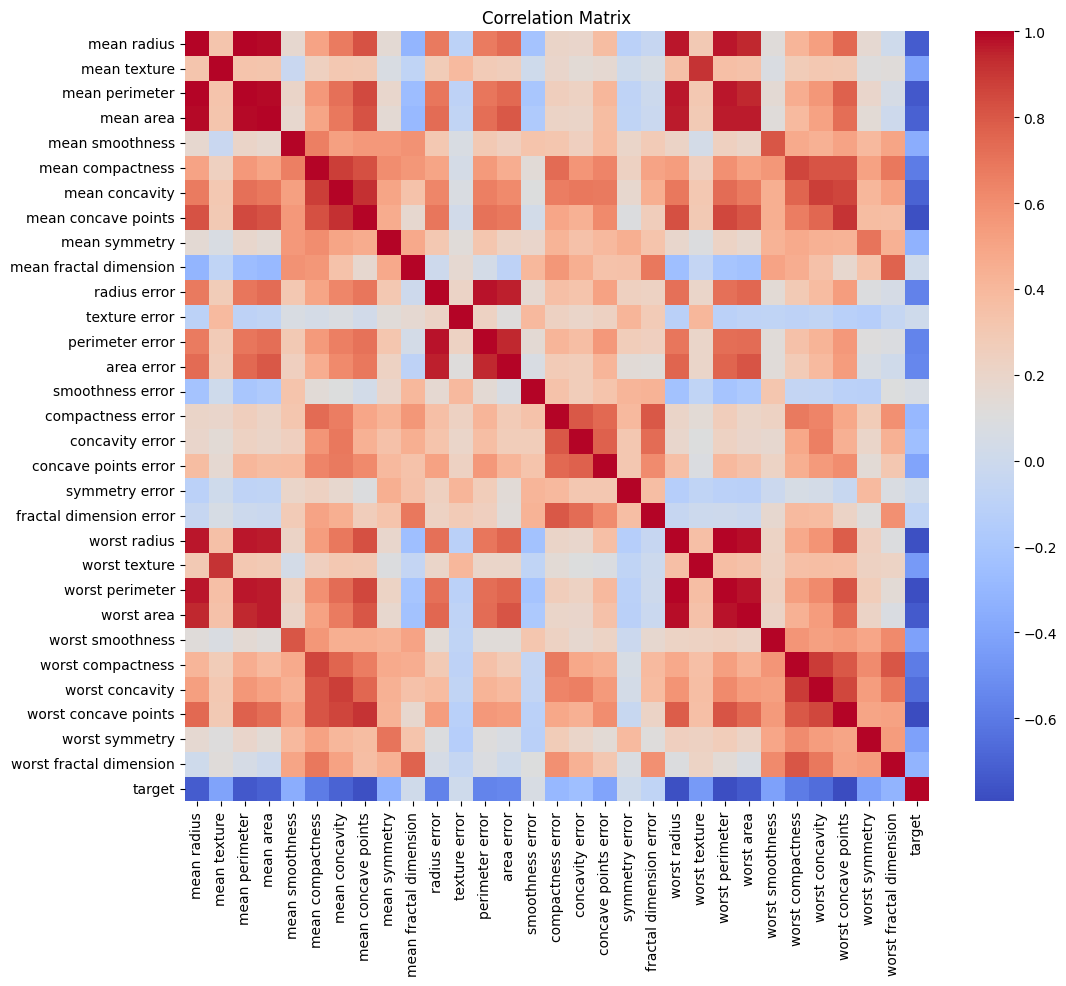


--- Covariance Matrix (first 5 rows) ---
                 mean radius  mean texture  mean perimeter      mean area  \
mean radius        12.418920      4.907582       85.447142    1224.483409   
mean texture        4.907582     18.498909       34.439759     485.993787   
mean perimeter     85.447142     34.439759      590.440480    8435.772345   
mean area        1224.483409    485.993787     8435.772345  123843.554318   
mean smoothness     0.008454     -0.001415        0.070836       0.876178   

                 mean smoothness  mean compactness  mean concavity  \
mean radius             0.008454          0.094197        0.190128   
mean texture           -0.001415          0.053767        0.103692   
mean perimeter          0.070836          0.714714        1.387234   
mean area               0.876178          9.264931       19.244924   
mean smoothness         0.000198          0.000490        0.000585   

                 mean concave points  mean symmetry  mean fractal dimensio

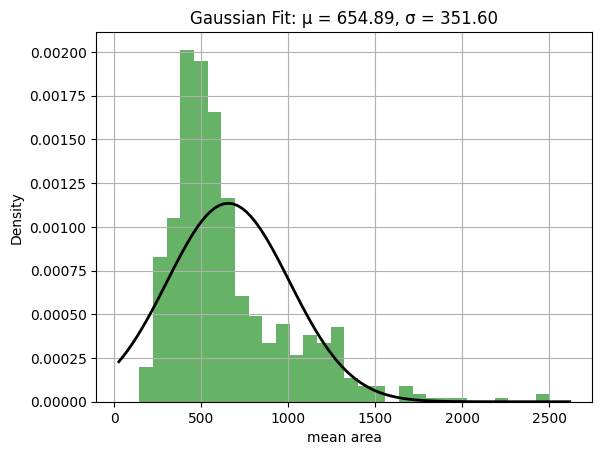


--- Z-Score (first 5 rows) ---
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, pearsonr, ttest_ind
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("\n--- Summary Statistics ---")
print(df.describe())

def detect_outliers_iqr(df):
    outlier_indices = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        outlier_indices[col] = outliers.index.tolist()
    return outlier_indices

print("\n--- Outliers Detected Using IQR ---")
outliers = detect_outliers_iqr(df)
for col, idx in outliers.items():
    print(f"{col}: {len(idx)} outliers")

plt.figure(figsize=(15, 6))
sns.boxplot(data=df.drop(columns='target'))
plt.xticks(rotation=90)
plt.title("Box Plot of Features")
plt.tight_layout()
plt.show()
feature = 'mean radius'
sorted_vals = np.sort(df[feature])
cdf = np.arange(len(sorted_vals)) / float(len(sorted_vals))
plt.plot(sorted_vals, cdf, label=f'CDF of {feature}')
plt.xlabel(feature)
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function')
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
print("\n--- Covariance Matrix (first 5 rows) ---")
print(df.cov().head())
pearson_coef, p_value = pearsonr(df['mean radius'], df['mean texture'])
print(f"\n--- Pearson Coefficient ---")
print(f"mean radius vs mean texture: coefficient = {pearson_coef:.4f}, p-value = {p_value:.4f}")
malignant = df[df['target'] == 0]['mean radius']
benign = df[df['target'] == 1]['mean radius']
t_stat, p_val = ttest_ind(malignant, benign)
print("\n--- Hypothesis Testing (T-test for mean radius) ---")
print(f"T-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
feature = 'mean area'
mu, std = norm.fit(df[feature])
plt.hist(df[feature], bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title(f"Gaussian Fit: μ = {mu:.2f}, σ = {std:.2f}")
plt.xlabel(feature)
plt.ylabel("Density")
plt.grid()
plt.show()
z_scores = stats.zscore(df.drop(columns='target'))
z_df = pd.DataFrame(z_scores, columns=df.columns[:-1])
print("\n--- Z-Score (first 5 rows) ---")
print(z_df.head())
